In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
plt.style.use('Solarize_Light2')
plt.style.context('grayscale')
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Cloth_size_prediction.csv')
df.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


In [4]:
df.describe()

,weight,age,height
count,119734.000000,119477.000000,119404.000000
mean,61.756811,34.027311,165.805794
std,9.944863,8.149447,6.737651
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.180000
max,136.000000,117.000000,193.040000


In [5]:
df.isnull().sum()

weight      0
age       257
height    330
size        0
dtype: int64

In [6]:
df.dropna(inplace = True)
df.isnull().sum()

weight    0
age       0
height    0
size      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119153 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119153 non-null  int64  
 1   age     119153 non-null  float64
 2   height  119153 non-null  float64
 3   size    119153 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 4.5+ MB


### Q1. Find the total count for each class of size.

In [8]:
df['size'].value_counts()

M       29575
S       21829
XXXL    21259
XL      19033
L       17481
XXS      9907
XXL        69
Name: size, dtype: int64

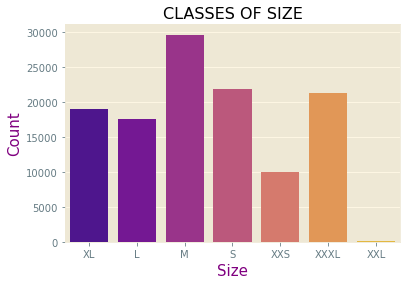

In [9]:
sns.countplot(data = df,x = 'size',palette = 'plasma')
plt.xlabel("Size",fontsize = 15,color = 'purple')
plt.ylabel("Count",fontsize = 15,color = 'purple')
plt.title("CLASSES OF SIZE")
plt.show()

### Q2. Which feature has the highest correlation?

In [10]:
from sklearn import preprocessing

In [11]:
l = preprocessing.LabelEncoder()
df['size'] = l.fit_transform(df['size'])

In [12]:
df.head()

,weight,age,height,size
0,62,28.0,172.72,3
1,59,36.0,167.64,0
2,61,34.0,165.10,1
3,65,27.0,175.26,0
4,62,45.0,172.72,1


In [13]:
df.corr()

,weight,age,height,size
weight,1.000000,0.068157,0.388551,0.422526
age,0.068157,1.000000,-0.003044,0.079924
height,0.388551,-0.003044,1.000000,0.026302
size,0.422526,0.079924,0.026302,1.000000


<AxesSubplot:>

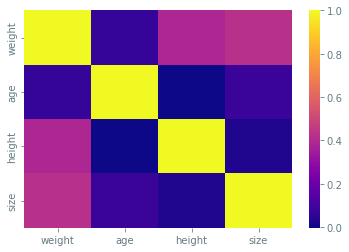

In [14]:
sns.heatmap(df.corr(),cmap = 'plasma')

### Q3. Segment the data according to weight, height and age.

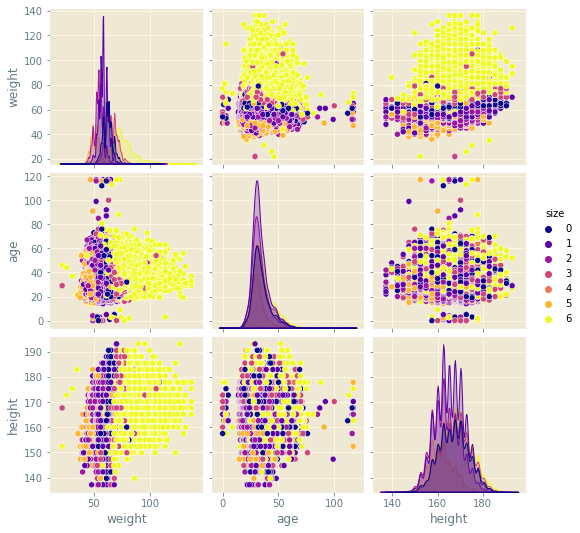

In [15]:
sns.pairplot(data = df,hue = 'size',palette = 'plasma')
plt.xlabel('',fontsize = 15,color = 'purple')
plt.ylabel('',fontsize = 15,color = 'purple')
plt.show()

### Q4. Train and apply model to predict the size with user inputs.

In [16]:
x = df[['weight','age','height']]
y = df['size']

In [17]:
from sklearn import metrics

### Using Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.7,random_state = True)

In [20]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [21]:
pred = model.predict(x_test)

In [22]:
metrics.accuracy_score(y_test,pred)

0.4958876517652325

In [23]:
metrics.confusion_matrix(y_test,pred)

array([[ 473, 2614,  214, 1602,    0,   10,  343],
       [ 318, 5587, 1730,  871,    0,  183,  132],
       [  41, 2433, 3122,  132,    0,  960,   20],
       [ 395, 1497,   99, 2364,    0,   14, 1268],
       [   2,    0,    0,    6,    0,    0,   17],
       [   6,  400, 1294,   10,    0, 1211,    3],
       [ 108,  212,   14, 1061,    0,   11, 4969]], dtype=int64)

In [24]:
print(metrics.classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.35      0.09      0.14      5256
           1       0.44      0.63      0.52      8821
           2       0.48      0.47      0.47      6708
           3       0.39      0.42      0.40      5637
           4       0.00      0.00      0.00        25
           5       0.51      0.41      0.46      2924
           6       0.74      0.78      0.76      6375

    accuracy                           0.50     35746
   macro avg       0.42      0.40      0.39     35746
weighted avg       0.48      0.50      0.47     35746



### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dtc = DecisionTreeClassifier()

In [27]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
pred1 = dtc.predict(x_test)

In [29]:
metrics.accuracy_score(y_test,pred1)

0.5025177642253679

In [30]:
metrics.confusion_matrix(y_test,pred1)

array([[1633, 1935,  199, 1219,    2,   20,  248],
       [1258, 5177, 1550,  559,    0,  187,   90],
       [ 248, 2359, 3213,   69,    0,  796,   23],
       [1252, 1015,  120, 2359,    3,    9,  879],
       [   8,    0,    0,    8,    0,    0,    9],
       [  32,  391, 1435,    6,    0, 1057,    3],
       [ 330,  170,   19, 1311,   10,   11, 4524]], dtype=int64)

In [31]:
print(metrics.classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.34      0.31      0.33      5256
           1       0.47      0.59      0.52      8821
           2       0.49      0.48      0.49      6708
           3       0.43      0.42      0.42      5637
           4       0.00      0.00      0.00        25
           5       0.51      0.36      0.42      2924
           6       0.78      0.71      0.74      6375

    accuracy                           0.50     35746
   macro avg       0.43      0.41      0.42     35746
weighted avg       0.51      0.50      0.50     35746



### Using KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [34]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [35]:
pred2 = knn.predict(x_test)

In [36]:
metrics.accuracy_score(y_test,pred2)

0.42695686230627206

In [37]:
metrics.confusion_matrix(y_test,pred2)

array([[1447, 1455,  399, 1383,    7,   58,  507],
       [1648, 3517, 1924, 1088,    3,  388,  253],
       [ 480, 2056, 2771,  258,    0, 1100,   43],
       [1296,  914,  224, 1995,    9,   32, 1167],
       [   7,    3,    0,    5,    0,    0,   10],
       [  67,  486, 1212,   26,    0, 1124,    9],
       [ 469,  205,   35, 1227,   15,   16, 4408]], dtype=int64)

In [38]:
print(metrics.classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.27      0.28      0.27      5256
           1       0.41      0.40      0.40      8821
           2       0.42      0.41      0.42      6708
           3       0.33      0.35      0.34      5637
           4       0.00      0.00      0.00        25
           5       0.41      0.38      0.40      2924
           6       0.69      0.69      0.69      6375

    accuracy                           0.43     35746
   macro avg       0.36      0.36      0.36     35746
weighted avg       0.43      0.43      0.43     35746



### Choosing K value :

In [39]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

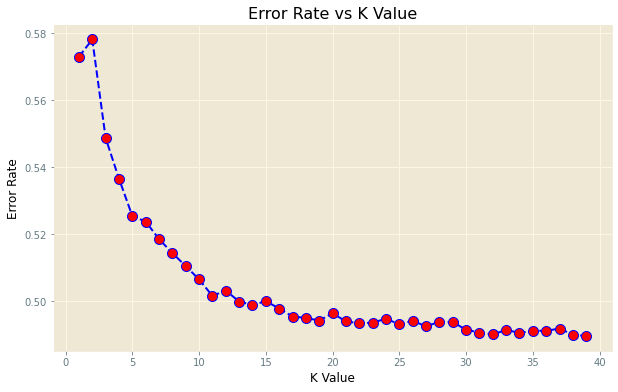

In [40]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'blue',linestyle = 'dashed',marker = 'o',markerfacecolor = 'red',markersize = 10)
plt.title("Error Rate vs K Value")
plt.xlabel('K Value',color = 'Black')
plt.ylabel('Error Rate',color = 'Black')
plt.show()

In [41]:
knn34 = KNeighborsClassifier(n_neighbors = 34)
knn34.fit(x_train,y_train)
pred4 = knn34.predict(x_test)
print("With k = 34 \n")
print(metrics.accuracy_score(y_test,pred4))
print(metrics.confusion_matrix(y_test,pred4))
print(metrics.classification_report(y_test,pred4))

With k = 34 

0.509483578582219
[[1341 2007  206 1440    0   17  245]
 [1064 5089 1751  645    0  181   91]
 [ 167 2209 3372   83    0  858   19]
 [1066 1049   98 2366    0   12 1046]
 [   6    1    0    4    0    0   14]
 [   9  324 1353    4    0 1233    1]
 [ 243  132   22 1157    0   10 4811]]
              precision    recall  f1-score   support

           0       0.34      0.26      0.29      5256
           1       0.47      0.58      0.52      8821
           2       0.50      0.50      0.50      6708
           3       0.42      0.42      0.42      5637
           4       0.00      0.00      0.00        25
           5       0.53      0.42      0.47      2924
           6       0.77      0.75      0.76      6375

    accuracy                           0.51     35746
   macro avg       0.43      0.42      0.42     35746
weighted avg       0.51      0.51      0.51     35746



### Using SVM

### Using Random Forest